##### The IMD Machine Learning Model:
Credit to: `Isaac Okello Opio`
The following were perfromed in this step:
1. Take a peek at the raw data.
2. Review the dimensions of my dataset.
3. Review the data types of attributes in the data.


In [202]:
#Import libraries
from pycaret import*
import pandas as pd #this is for dataframe manipulation
import numpy as np #this is for numerical / mathematical computing
import matplotlib.pyplot as plt #this is for visualisation
from IPython.display import display

In [203]:
#import data
IMD_data = pd.read_excel ("DATASET08MARCH2024.xlsx")

In [204]:
#EDA
IMD_data.head(5)

,patid,age,agecatak,AgeCategory,sex1,religion1,childeduc1,heightst1,weightst1,height_m,...,stin2vntr_,httlpr1,HTTLPRrs35531,rs35531,ptsd,gad,mdd,pc,intdis,IMDs
0,CHAKA/01/01/0001,11.668720,9 to 12,Adolescent,Female,Born Again,Pre-primary,134.0,31.0,1.340,...,NaN,3.0,NaN,NaN,0.0,0.0,1.0,1,1,Yes
1,CHAKA/01/01/0002,15.000000,13 to 17,Adolescent,Male,Protestant,Pre-primary,137.0,35.0,1.370,...,3.0,3.0,7.0,1.0,0.0,4.0,6.0,1,10,Yes
2,CHAKA/01/01/0003,6.020534,9 to 12,Adolescent,Female,Muslim,Pre-primary,120.1,19.0,1.201,...,1.0,1.0,2.0,2.0,0.0,0.0,3.0,0,3,Yes
3,CHAKA/01/02/0152,5.242984,5 to 8,Children,Female,Catholic,Pre-primary,99.0,15.0,0.990,...,3.0,2.0,6.0,2.0,0.0,0.0,0.0,0,0,No
4,CHAKA/01/02/0153,11.696100,9 to 12,Adolescent,Female,Muslim,Pre-primary,131.6,30.0,1.316,...,3.0,1.0,1.0,1.0,1.0,3.0,3.0,0,7,Yes


In [205]:
# List variable names
variable_names = IMD_data.columns.tolist()

# Print the variable names
print(variable_names)

['patid', 'age', 'agecatak', 'AgeCategory', 'sex1', 'religion1', 'childeduc1', 'heightst1', 'weightst1', 'height_m', 'BMI', 'rounded_bmi', 'BMI_category', 'childtrib1', 'motherali1', 'fatherali1', 'orphanhood', 'ses', 'ses_cat', 'livelihood1', 'sexualever1', 'childstay1', 'childartk1', 'childworst1', 'childpremt1', 'chilborhiv', 'tobacco_status', 'alcohol1', 'Stress', 'GroupCategory', 'cd4takeoff1', 'CD4_category', 'Viralload', 'Viralload_Category', 'tlbase', 'stin2vntr_', 'httlpr1', 'HTTLPRrs35531', 'rs35531', 'ptsd', 'gad', 'mdd', 'pc', 'intdis', 'IMDs']


In [206]:
#Dropping Non-Important and Redundant Variables 
# List of variables to drop
#Give DummyClass
#columns_to_drop = ['patid', 'height_m','motherali1', 'fatherali1', 'rounded_bmi', 'BMI','ses', 'ptsd', 'gad', 'mdd', 'pc', 'intdis']
#Gives best score, with AdaBoost
#columns_to_drop = ['patid', 'height_m','motherali1', 'fatherali1', 'rounded_bmi', 'BMI','ses', 'pc', 'intdis']
#Removing 
columns_to_drop = ['patid', 'height_m','motherali1', 'fatherali1', 'rounded_bmi', 'BMI','ses', 'pc', 'intdis']

#columns_to_drop = ['patid', 'height_m','motherali1', 'fatherali1', 'rounded_bmi', 'BMI','ses', 'pc', 'intdis']

# Dropping the specified columns
IMD_data = IMD_data.drop(columns=columns_to_drop)

Note: Removing MDD, PTSD, and GAD from the data drops performace from 90s% to 70s %

##### Dimensions of the Data
I had to check how much data I have, both in terms of rows and columns.
- Too many rows and algorithms may take too long to train. Too few and perhaps I do
not have enough data to train the algorithms.
- Too many features and some algorithms can be distracted or super poor performance due
to the curse of dimensionality.

In [207]:
print("Number of rows:", IMD_data.shape[0])
print("Number of columns:", IMD_data.shape[1])
#OR
print("The dimension is:", IMD_data.shape)

Number of rows: 736
Number of columns: 36
The dimension is: (736, 36)


##### Data Type For Each Attribute
The type of each attribute is important. Strings may need to be converted to foating point values or integers to represent categorical or ordinal values. 

In [208]:
IMD_data.dtypes

age                   float64
agecatak               object
AgeCategory            object
sex1                   object
religion1              object
childeduc1             object
heightst1             float64
weightst1             float64
BMI_category           object
childtrib1             object
orphanhood             object
ses_cat                object
livelihood1            object
sexualever1            object
childstay1             object
childartk1             object
childworst1            object
childpremt1            object
chilborhiv             object
tobacco_status         object
alcohol1               object
Stress                 object
GroupCategory          object
cd4takeoff1           float64
CD4_category           object
Viralload             float64
Viralload_Category     object
tlbase                float64
stin2vntr_            float64
httlpr1               float64
HTTLPRrs35531         float64
rs35531               float64
ptsd                  float64
gad       

#### Descriptive Statistics
Descriptive statistics can give a great insight into the shape of each attribute. 

In [209]:
IMD_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,696.0,10.574136,3.141758,4.525667,7.874744,10.368240,13.000000,1.711431e+01
heightst1,733.0,131.050887,22.690718,12.500000,119.000000,130.600000,144.000000,4.272000e+02
weightst1,736.0,29.878111,11.915348,10.000000,21.000000,27.000000,36.000000,1.530000e+02
cd4takeoff1,732.0,945.527322,533.852160,11.000000,568.750000,888.000000,1224.250000,3.924000e+03
Viralload,611.0,30247.690671,155631.745971,0.000000,0.000000,10.000000,801.500000,2.621863e+06
tlbase,613.0,1.147457,0.362307,0.019943,0.914130,1.133582,1.358633,2.179359e+00
stin2vntr_,658.0,2.474164,0.643503,1.000000,2.000000,3.000000,3.000000,3.000000e+00
httlpr1,698.0,1.399713,0.583710,1.000000,1.000000,1.000000,2.000000,3.000000e+00
HTTLPRrs35531,685.0,2.486131,1.765954,1.000000,1.000000,2.000000,3.000000,7.000000e+00
rs35531,685.0,1.379562,0.550537,1.000000,1.000000,1.000000,2.000000,3.000000e+00


#### Dependent Variable (DV)
Note that: The DV in this cases was being diagnosed with Internalizing Mental Disorder, IMD (Yes) or Not (No), This was calculated by ensuring all participants without any from of GAD, MDD, or PTSD, was assigned as "Not having IMD", while all those with any form of GAD, MDD, or PTSD, was amrked as having IMD. 

<Axes: xlabel='IMDs'>

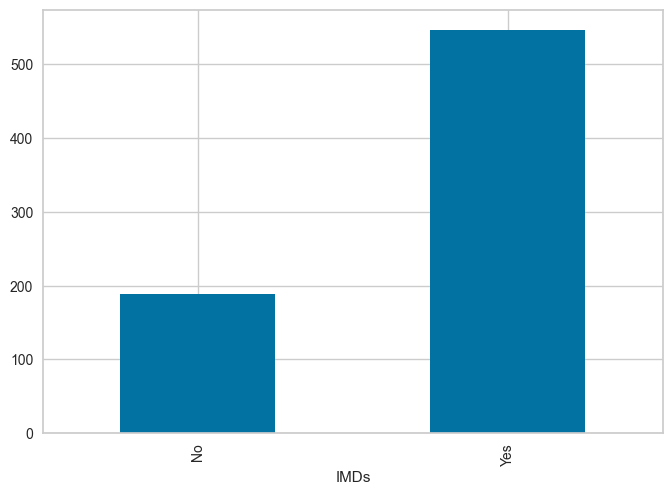

In [210]:
##Plotting the distribution of the dependent variable (DV). 
IMD_data.groupby('IMDs').size().plot(kind='bar')

In [211]:
#Checking at the distribution of the data
#IMD_data.hist()

NOTE: The above was not useful as the package (pycaret) cound perfrom transformations in all datasets. Unlike in scikit-learn that I would have to decide the data to transform based on the above plot. 

#### MODEL BUILDING USING PYCARET
Since this was a classification problem (Supervised machine learning),the classification package from pycaret was used. Thisn package conatins several algorithms:

* Logistic Regression
* Support Vector Machines
* Decision Trees
* Naive Bayes
* K-Nearest Neighbors
* Random Forests

In [212]:
#Import classification model from pycaret
from pycaret.classification import *

In [213]:
# Setting up the data for machine learning modeling using the pycaret setup function
# IMD_data: Your dataset or data structure
# target='IMDs': Specifying 'IMDs' as the target variable to predict
# session_id=123: Setting a session ID (seed) for reproducibility

s = setup(IMD_data, target='IMDs', session_id=123)

,Description,Value
0,Session id,123
1,Target,IMDs
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(736, 36)"
5,Transformed data shape,"(736, 74)"
6,Transformed train set shape,"(515, 74)"
7,Transformed test set shape,"(221, 74)"
8,Numeric features,13
9,Categorical features,22


In [214]:
#Model training
# Comparing and selecting the best-performing model based on default evaluation metric
best = s.compare_models()

# Retrieve the metrics dataframe for all compared models
metrics_df = pull()
print(metrics_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9980,0.0000,0.9980,0.9981,0.9980,0.9947,0.9948,0.2710
lightgbm,Light Gradient Boosting Machine,0.9980,0.0000,0.9980,0.9981,0.9980,0.9947,0.9948,0.4050
gbc,Gradient Boosting Classifier,0.9922,0.0000,0.9922,0.9924,0.9921,0.9791,0.9796,0.3330
qda,Quadratic Discriminant Analysis,0.9864,0.0000,0.9864,0.9869,0.9862,0.9630,0.9642,0.2110
dt,Decision Tree Classifier,0.9845,0.0000,0.9845,0.9850,0.9845,0.9593,0.9600,0.1880
rf,Random Forest Classifier,0.9805,0.0000,0.9805,0.9814,0.9801,0.9468,0.9489,0.3120
lr,Logistic Regression,0.9532,0.0000,0.9532,0.9586,0.9542,0.8830,0.8870,0.3040
et,Extra Trees Classifier,0.8639,0.0000,0.8639,0.8674,0.8510,0.5893,0.6190,0.2940
ridge,Ridge Classifier,0.8037,0.0000,0.8037,0.7979,0.7936,0.4422,0.4557,0.1860
lda,Linear Discriminant Analysis,0.8036,0.0000,0.8036,0.8065,0.8013,0.4773,0.4846,0.1830


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

                                    Model  Accuracy  AUC  Recall   Prec.  \
ada                  Ada Boost Classifier    0.9980  0.0  0.9980  0.9981   
lightgbm  Light Gradient Boosting Machine    0.9980  0.0  0.9980  0.9981   
gbc          Gradient Boosting Classifier    0.9922  0.0  0.9922  0.9924   
qda       Quadratic Discriminant Analysis    0.9864  0.0  0.9864  0.9869   
dt               Decision Tree Classifier    0.9845  0.0  0.9845  0.9850   
rf               Random Forest Classifier    0.9805  0.0  0.9805  0.9814   
lr                    Logistic Regression    0.9532  0.0  0.9532  0.9586   
et                 Extra Trees Classifier    0.8639  0.0  0.8639  0.8674   
ridge                    Ridge Classifier    0.8037  0.0  0.8037  0.7979   
lda          Linear Discriminant Analysis    0.8036  0.0  0.8036  0.8065   
dummy                    Dummy Classifier    0.7437  0.0  0.7437  0.5531   
nb                            Naive Bayes    0.7340  0.0  0.7340  0.6804   
knn         

In [215]:
#Print the best model
print(best)

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)


In [216]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [217]:
# Save specific plots using plot_model with save=True

# List of plot types to include
plot_types = ['auc', 'confusion_matrix', 'feature', 'learning']

# Iterate over plot types and save each one
for plot_type in plot_types:
    plot_model(best, plot=plot_type, save=True, verbose=False)

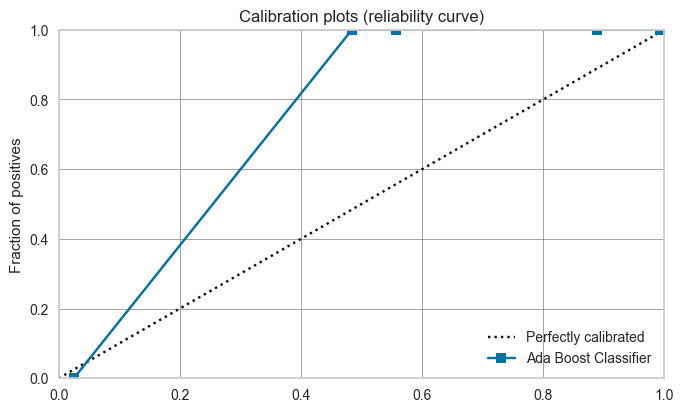

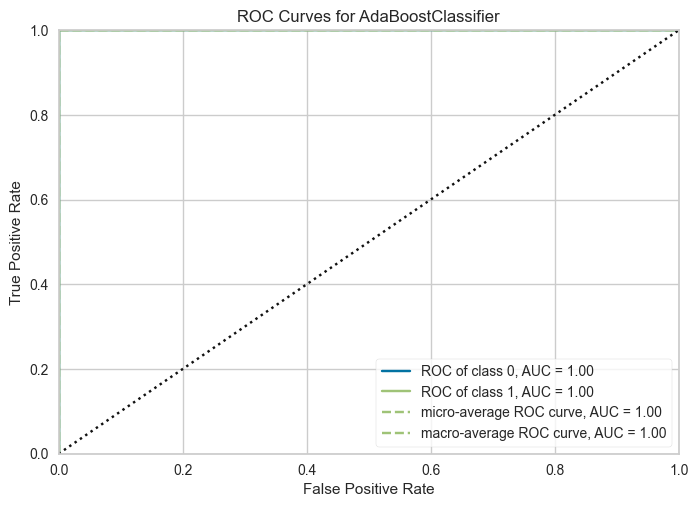

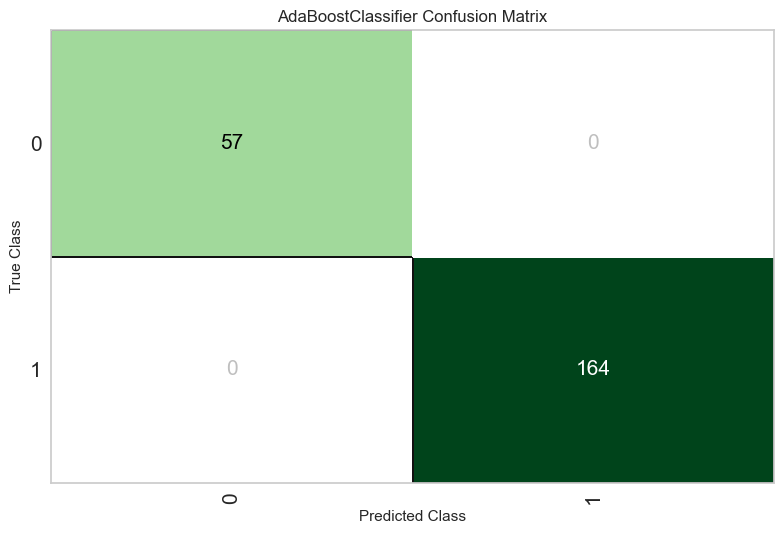

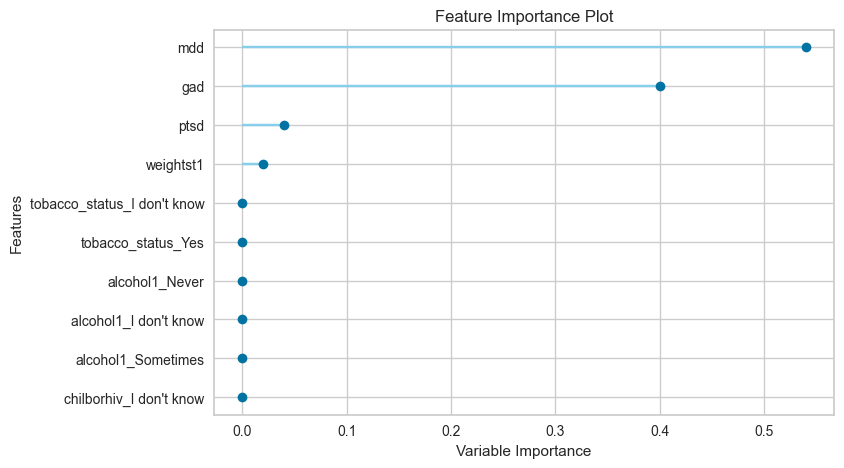

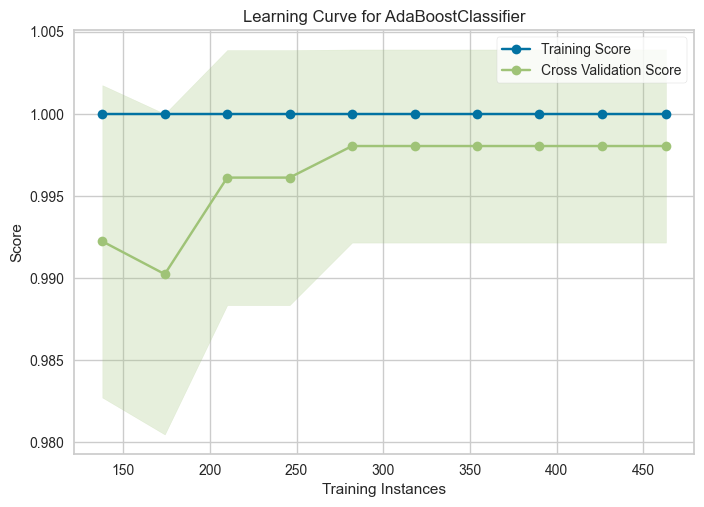

In [218]:
#DISPLAY THE PLOTS
#Import the package
from IPython.display import Image, display

# Display the PNG images
display(Image('Calibration Curve.png'))
display(Image("AUC.png"))
display(Image("Confusion Matrix.png"))
display(Image("Feature Importance.png"))
display(Image("Learning Curve.png"))

#### The Predict Hold DATA (Testing/assess perfromace)
The predict_holdout is a portion of the dataset that is intentionally set aside and not used during the training of the model. This set is reserved for evaluating the model's performance on unseen data.

In [219]:
#predict/testing
predict_holdout =s.predict_model(best) #Making predictions on the holdout set using the best model (predict_model)

#Retrieve the metrics dataframe
metrics_df = pull() #Calculating various classification metrics based on the predictions made
print(metrics_df) #Printing the metrics dataframe to the console

                  Model  Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0  Ada Boost Classifier       1.0  1.0     1.0    1.0  1.0    1.0  1.0


In [220]:
# Predicting on new data

# Creating a copy of the original data without the 'IMDs' column
New_IMD_data = IMD_data.copy().drop('IMDs', axis=1)

# Making predictions on the new data using the best-performing model
New_Predictions = s.predict_model(best, New_IMD_data)

# Displaying the first 5 rows of the predictions
New_Predictions.head(5)

,age,agecatak,AgeCategory,sex1,religion1,childeduc1,heightst1,weightst1,BMI_category,childtrib1,...,tlbase,stin2vntr_,httlpr1,HTTLPRrs35531,rs35531,ptsd,gad,mdd,prediction_label,prediction_score
0,11.668720,9 to 12,Adolescent,Female,Born Again,Pre-primary,134.000000,31.0,Underweight,Non-Munganda but Ugandan,...,1.085469,NaN,3.0,NaN,NaN,0.0,0.0,1.0,Yes,0.6422
1,15.000000,13 to 17,Adolescent,Male,Protestant,Pre-primary,137.000000,35.0,Normal weight,Non-Munganda but Ugandan,...,1.206384,3.0,3.0,7.0,1.0,0.0,4.0,6.0,Yes,0.9123
2,6.020534,9 to 12,Adolescent,Female,Muslim,Pre-primary,120.099998,19.0,Underweight,Muganda,...,1.251031,1.0,1.0,2.0,2.0,0.0,0.0,3.0,Yes,0.7084
3,5.242984,5 to 8,Children,Female,Catholic,Pre-primary,99.000000,15.0,Underweight,Non-Munganda but Ugandan,...,1.682923,3.0,2.0,6.0,2.0,0.0,0.0,0.0,No,0.6625
4,11.696100,9 to 12,Adolescent,Female,Muslim,Pre-primary,131.600006,30.0,Underweight,Muganda,...,1.131768,3.0,1.0,1.0,1.0,1.0,3.0,3.0,Yes,0.9782
